In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

### 导入数据

In [2]:
path = r'C:/Users/jing/OneDrive/Desktop/2018.10.18摇床取样数据（品位+重量汇总）.xlsx'

data = pd.read_excel(path, sheet_name='73-数据源')
data = data[['R','G','B','H','S','V','L','A','B.1','gray','锡精矿品位','重量']]

In [3]:
data.corr()

,R,G,B,H,S,V,L,A,B.1,gray,锡精矿品位,重量
R,1.000000,0.977988,0.923792,-0.792289,0.629054,0.997952,0.988661,0.923022,0.879855,0.990336,0.854771,-0.734303
G,0.977988,1.000000,0.975210,-0.693817,0.553582,0.982341,0.997359,0.829282,0.791241,0.996775,0.747886,-0.659088
B,0.923792,0.975210,1.000000,-0.533374,0.490006,0.933725,0.965501,0.747893,0.646207,0.963239,0.652432,-0.620657
H,-0.792289,-0.693817,-0.533374,1.000000,-0.639252,-0.778666,-0.723089,-0.829580,-0.956326,-0.728334,-0.837271,0.586891
S,0.629054,0.553582,0.490006,-0.639252,1.000000,0.622003,0.579001,0.691953,0.653691,0.585368,0.658636,-0.557007
V,0.997952,0.982341,0.933725,-0.778666,0.622003,1.000000,0.991279,0.910487,0.866174,0.993067,0.835532,-0.715427
L,0.988661,0.997359,0.965501,-0.723089,0.579001,0.991279,1.000000,0.861672,0.819724,0.999332,0.782920,-0.683665
A,0.923022,0.829282,0.747893,-0.829580,0.691953,0.910487,0.861672,1.000000,0.899032,0.867158,0.949268,-0.815159
B.1,0.879855,0.791241,0.646207,-0.956326,0.653691,0.866174,0.819724,0.899032,1.000000,0.823763,0.877587,-0.668810
gray,0.990336,0.996775,0.963239,-0.728334,0.585368,0.993067,0.999332,0.867158,0.823763,1.000000,0.788771,-0.689375


In [4]:
# rgb = data[['R', 'G', 'B']]
# hsv = data[['H', 'S', 'V']]
# lab = data[['L', 'A', 'B.1']]
# gray = data['gray']

In [5]:
# import cv2

# green = np.uint8([np.array(rgb).tolist()])
# hsv_green = cv2.cvtColor(green , cv2.COLOR_RGB2HSV)
# print(np.round(hsv_green[:,:-1,:]/255, 2))

In [6]:
# green = np.uint8([np.array(rgb).tolist()])
# hsv_green = cv2.cvtColor(green , cv2.COLOR_RGB2LAB)
# print(np.round(hsv_green[:,:-1,:], 2))

In [7]:
# green = np.uint8([np.array(rgb).tolist()])
# hsv_green = cv2.cvtColor(green , cv2.COLOR_RGB2GRAY)
# print(np.round(hsv_green, 2))

### 数据预处理

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


def data_preprocessing(x, y):

    X = x
    # X = data[['R','G','B']]
    # X = data[['R','G','B','H','S','V','L','A','B.1','gray']]
    # X = data[['R','G','B','锡精矿品位']]
    y = y
    # y = data['锡精矿品位']
    # y = data['重量']
    y = np.array(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

    scaler1 = MinMaxScaler()

    X_scaler1 = scaler1.fit_transform(X)
    y_scaler1 = scaler1.fit_transform(y.reshape(-1, 1))

    scaler2 = StandardScaler()

    X_scaler2 = scaler2.fit_transform(X)
    y_scaler2 = scaler2.fit_transform(y.reshape(-1, 1))

    Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaler2, y_scaler2, test_size=0.2, random_state=666)
    
    return Xtrain, Xtest, ytrain, ytest, scaler2

### 训练模型

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet,RANSACRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score


def training_model(xtrain, ytrain, xtest, ytest):
    # 训练回归模型
    n_samples, n_features = xtrain.shape # 总样本数，总特征数
    n_folds = 6 # 交叉检验次数

    lr = LinearRegression() # 线性回归
    svr = SVR() # 支持向量机回归
    rf = RandomForestRegressor() # 随机森林回归
    """
    n_estimators=20,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=n_features,
    random_state=10
    """
    gbr = GradientBoostingRegressor() # GBDT回归
    """
    learning_rate=0.1,
    n_estimators=120,
    max_depth=3,
    min_samples_leaf=1,
    min_samples_split=2,
    max_features=n_features,
    subsample=1
    """
    knn = KNeighborsRegressor() # K最近邻回归
    """
    n_neighbors=5, 
    weights='distance', 
    leaf_size=50
    """
    dt = DecisionTreeRegressor() # 决策树回归
    """
    criterion='mse', 
    max_depth=None, 
    max_features=n_features, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    min_impurity_split=None, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    min_weight_fraction_leaf=0.0, 
    random_state=None, 
    splitter='best'
    """
    ransac = RANSACRegressor() # 随机采样一致性回归
    ridge = Ridge() # Ridge回归
    lasso = Lasso() # Lasso回归
    en = ElasticNet() # 弹性网络回归

    mnames = ['LinearRegression', 
              'SVR', 
              'RandomForestRegressor', 
              'GradientBoostingRegressor', 
              'KNeighborsRegressor', 
              'DecisionTreeRegressor', 
              'RANSACRegressor', 
              'Ridge', 
              'Lasso', 
              'ElasticNet'] # 回归模型名称列表
    mlist = [lr, svr, rf, gbr, knn, dt, ransac, ridge, lasso, en] # 回归模型对象列表

    cv_scores = [] # 交叉检验结果列表
    y_pred = [] # 回归模型预测y值列表

    for model in mlist:
        scores = cross_val_score(model, xtrain, ytrain.ravel(), cv=n_folds) # 将每个回归模型导入交叉检验
        predicted = model.fit(xtrain, ytrain.ravel()).predict(xtest) # 回归训练得到预测y值
        cv_scores.append(scores) # 将交叉验证结果存入列表
        y_pred.append(predicted) # 将回归训练中得到的预测y值存入列表

    # 模型效果评估
    metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score] # 回归评估指标对象集
    metrics_list = [] # 回归评估指标列表

    for i in range(len(mlist)):
        tmp = [] # 每个内循环的临时结果列表
        for m in metrics_name:
            score = m(ytest, y_pred[i]) # 计算每个回归指标结果
            tmp.append(score)
        metrics_list.append(tmp)

    df_cv = pd.DataFrame(cv_scores, index=mnames) # 交叉验证数据框
    df_metrics = pd.DataFrame(metrics_list, index=mnames, columns=['ev', 'mae', 'mse', 'r2']) # 回归指标数据框

    return df_cv, df_metrics, y_pred, mnames

D:\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [10]:
# x = data[['R','G','B']]
# y = data['锡精矿品位']

# Xtrain, Xtest, ytrain, ytest, scaler2 = data_preprocessing(x, y)
# df_cv, df_metrics, y_pred, mnames = training_model(Xtrain, ytrain, Xtest, ytest)

In [11]:
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures   # 生成多项式特征,不是直接用多项式模型拟合
# #http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures

# lr = LinearRegression()
# pr = LinearRegression()

# quadratic = PolynomialFeatures(degree=3)   # degree设置多项式拟合中多项式的最高次数
# X_quad = quadratic.fit_transform(Xtrain)   # X列向量，fit_transform是对X按列求[1, X, X^2]，即构造二次项数据
# # For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
# # fit linear features
# lr.fit(Xtrain, ytrain.ravel())
# y_lin_fit = lr.predict(Xtrain)   # 利用线性回归对构造的X_fit数据预测

# # fit quadratic features
# pr.fit(X_quad, ytrain.ravel())   # X_quad是训练数据,使用它进行建模得多项式系数
# y_quad_fit = pr.predict(X_quad)   # 利用二次多项式对构造的X_fit数据预测

# # plot results
# plt.scatter(Xtrain[:,-1], ytrain.ravel(), label='训练样本')
# plt.plot(Xtrain[:,-1], y_lin_fit, label='线形拟合', linestyle='--')
# plt.plot(sorted(Xtrain[:,-1]), y_quad_fit, label='多项式拟合')
# plt.legend(loc='upper right')

# plt.tight_layout()
# # plt.savefig('./poly_example.png', dpi=300)

# plt.show()

In [12]:
# import matplotlib.pyplot as plt
# import numpy as np

# z1 = np.polyfit(Xtrain[:,-1], ytrain, 3).ravel() # 用3次多项式拟合
# p1 = np.poly1d(z1)
# print(p1) # 在屏幕上打印拟合多项式
# yvals = p1(Xtrain[:,-1]) # 也可以使用yvals=np.polyval(z1,x)
# plt.plot(Xtrain[:,-1], ytrain, '*',label='原始样本')
# plt.plot(sorted(Xtrain[:,-1], reverse=False), yvals, 'r',label='多项式拟合')
# plt.xlabel('x axis')
# plt.ylabel('y axis')
# plt.legend(loc=1) # 指定legend的位置,读者可以自己help它的用法
# plt.title('polyfitting')
# plt.show()

In [13]:
# # 使用非线性最小二乘法拟合
# import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit
# import numpy as np

# # 用指数形式来拟合
# def func(x,a,b):
#     return a*np.exp(b/x)
# popt, pcov = curve_fit(func, Xtrain[:,-1].ravel(), ytrain.ravel())
# a = popt[0] # popt里面是拟合系数，读者可以自己help其用法
# b = popt[1]
# yvals = func(Xtrain[:,-1],a,b)
# plt.plot(Xtrain[:,-1], ytrain, '*',label='原始样本')
# plt.plot(sorted(Xtrain[:,-1], reverse=False), yvals, 'r',label='指数曲线拟合')
# plt.xlabel('x axis')
# plt.ylabel('y axis')
# plt.legend(loc=1) # 指定legend的位置,读者可以自己help它的用法
# plt.title('curve_fit')
# plt.show()

### 模型评估和结果输出

In [14]:
x = data[['R','G','B']]
y = data['锡精矿品位']

Xtrain, Xtest, ytrain, ytest, scaler2 = data_preprocessing(x, y)
df_cv, df_metrics, y_pred, mnames = training_model(Xtrain, ytrain, Xtest, ytest)

In [15]:
df_cv.mean(axis=1).sort_values(ascending=False)

RANSACRegressor              0.832783
LinearRegression             0.827832
Ridge                        0.708902
SVR                          0.650769
RandomForestRegressor        0.632544
GradientBoostingRegressor    0.622596
KNeighborsRegressor          0.595686
DecisionTreeRegressor        0.573763
ElasticNet                   0.100985
Lasso                       -0.315172
dtype: float64

In [16]:
df_cv.std(axis=1).sort_values(ascending=True)

RANSACRegressor              0.111974
LinearRegression             0.130378
ElasticNet                   0.277862
Ridge                        0.294782
Lasso                        0.364993
SVR                          0.470408
RandomForestRegressor        0.577333
KNeighborsRegressor          0.582281
DecisionTreeRegressor        0.648677
GradientBoostingRegressor    0.649421
dtype: float64

In [17]:
df_metrics.sort_values(by='r2', ascending=False)

,ev,mae,mse,r2
SVR,9.631585e-01,0.146109,0.036172,0.962544
LinearRegression,9.431994e-01,0.166142,0.055259,0.942779
Ridge,9.422029e-01,0.195906,0.055820,0.942198
RANSACRegressor,9.270542e-01,0.198611,0.071958,0.925486
RandomForestRegressor,9.503766e-01,0.223304,0.084814,0.912173
GradientBoostingRegressor,9.324005e-01,0.218071,0.089044,0.907794
KNeighborsRegressor,8.924965e-01,0.297044,0.134118,0.861119
DecisionTreeRegressor,6.932715e-01,0.459036,0.425739,0.559140
ElasticNet,3.350218e-01,0.814543,0.701317,0.273775
Lasso,-4.440892e-16,1.014098,1.082348,-0.120789


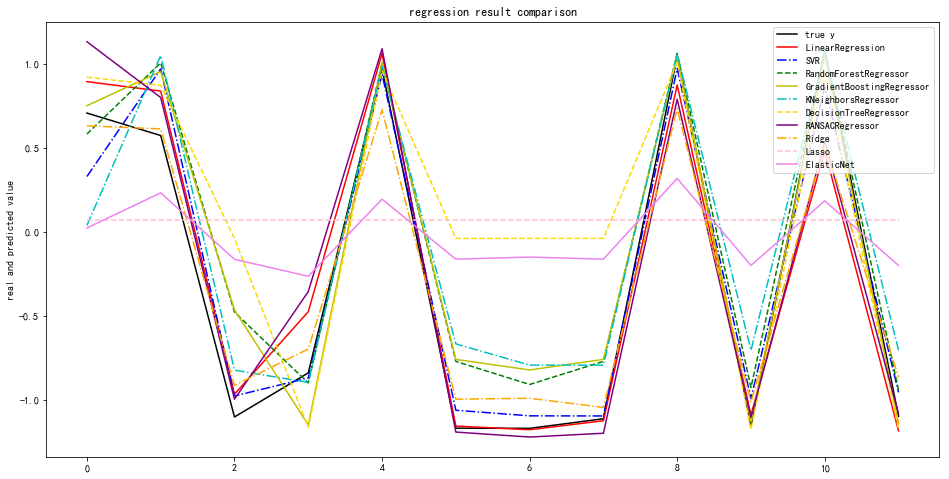

In [18]:
# 模型效果可视化
plt.figure(figsize=(16, 8))  # 创建画布
plt.plot(np.arange(Xtest.shape[0]), ytest, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c', 'gold', 'purple', 'orange', 'pink', 'Violet']  # 颜色列表
linestyle_list = ['-', '-.', '--', '-', '-.', '--', '-', '-.', '--', '-']  # 样式列表
for i, pre_y in enumerate(y_pred):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(Xtest.shape[0]), y_pred[i], color=color_list[i], linestyle=linestyle_list[i], label=mnames[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.show()  # 展示图像

In [19]:
pred = pd.DataFrame(scaler2.inverse_transform(y_pred)).T
pred.columns = ['线性回归', '支持向量机', '随机森林', 'GBDT', 'KNN', '决策树', 'RANSAC', 'Ridge', 'Lasso', '弹性网络']
pred['实际值'] = pd.DataFrame(scaler2.inverse_transform(ytest))
pred

,线性回归,支持向量机,随机森林,GBDT,KNN,决策树,RANSAC,Ridge,Lasso,弹性网络,实际值
0,68.559363,50.485102,58.5790,63.966089,41.1674,69.400,76.162145,60.137920,42.155792,40.673848,62.570
1,66.753195,70.975344,72.1250,70.481199,73.5040,67.860,65.525524,59.555173,42.155792,47.379881,58.290
2,9.023605,8.689468,24.6560,25.073016,13.6174,38.700,8.071336,10.700390,42.155792,34.716620,4.690
3,24.735043,12.125231,11.1672,3.185477,11.2740,2.714,28.567881,17.636822,42.155792,31.488245,13.090
4,73.908346,69.996779,72.0310,72.222666,71.4980,70.610,74.832268,63.202149,42.155792,46.161894,71.040
5,2.960149,5.969014,15.2740,15.657777,18.6160,38.700,1.811737,8.078118,42.155792,34.746003,2.559
6,2.259581,4.906720,10.8790,13.639711,14.5660,38.700,0.870208,8.256877,42.155792,35.142204,2.524
7,3.970158,4.883324,15.2740,15.657777,14.5660,38.700,1.589178,6.517136,42.155792,34.746003,4.350
8,67.912673,71.071209,73.9280,73.360740,73.8640,72.290,65.194424,63.428759,42.155792,50.123903,73.350
9,5.061854,8.176180,10.3102,3.738370,17.3972,2.316,4.636323,7.541840,42.155792,33.557400,3.030


In [20]:
x = data[['H','S','V']]
y = data['锡精矿品位']

Xtrain, Xtest, ytrain, ytest, scaler2 = data_preprocessing(x, y)
df_cv, df_metrics, y_pred, mnames = training_model(Xtrain, ytrain, Xtest, ytest)

In [21]:
df_cv.mean(axis=1).sort_values(ascending=False)

KNeighborsRegressor          0.759825
SVR                          0.706822
DecisionTreeRegressor        0.695411
GradientBoostingRegressor    0.695202
RandomForestRegressor        0.668610
ElasticNet                   0.186895
Ridge                       -0.138477
Lasso                       -0.315172
LinearRegression            -0.877288
RANSACRegressor             -1.113150
dtype: float64

In [22]:
df_cv.std(axis=1).sort_values(ascending=True)

DecisionTreeRegressor        0.286511
ElasticNet                   0.319359
GradientBoostingRegressor    0.323654
RandomForestRegressor        0.324897
KNeighborsRegressor          0.354900
Lasso                        0.364993
SVR                          0.374361
Ridge                        1.681873
LinearRegression             3.446874
RANSACRegressor              4.410532
dtype: float64

In [23]:
df_metrics.sort_values(by='r2', ascending=False)

,ev,mae,mse,r2
SVR,9.776980e-01,0.156550,0.033974,0.964820
KNeighborsRegressor,9.599021e-01,0.190491,0.052200,0.945946
GradientBoostingRegressor,8.796372e-01,0.272381,0.132890,0.862390
RANSACRegressor,8.755841e-01,0.335051,0.144679,0.850182
LinearRegression,8.553677e-01,0.333627,0.146719,0.848070
Ridge,8.515903e-01,0.338512,0.150675,0.843974
RandomForestRegressor,8.710055e-01,0.308360,0.151795,0.842813
DecisionTreeRegressor,8.401552e-01,0.243150,0.162328,0.831907
ElasticNet,3.733755e-01,0.794236,0.675068,0.300956
Lasso,-4.440892e-16,1.014098,1.082348,-0.120789


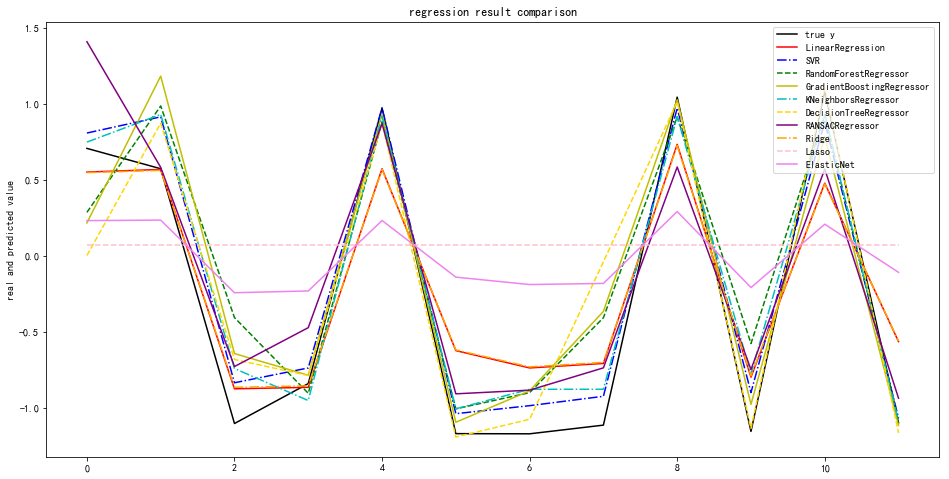

In [24]:
# 模型效果可视化
plt.figure(figsize=(16, 8))  # 创建画布
plt.plot(np.arange(Xtest.shape[0]), ytest, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c', 'gold', 'purple', 'orange', 'pink', 'Violet']  # 颜色列表
linestyle_list = ['-', '-.', '--', '-', '-.', '--', '-', '-.', '--', '-']  # 样式列表
for i, pre_y in enumerate(y_pred):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(Xtest.shape[0]), y_pred[i], color=color_list[i], linestyle=linestyle_list[i], label=mnames[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.show()  # 展示图像

In [25]:
pred = pd.DataFrame(scaler2.inverse_transform(y_pred)).T
pred.columns = ['线性回归', '支持向量机', '随机森林', 'GBDT', 'KNN', '决策树', 'RANSAC', 'Ridge', 'Lasso', '弹性网络']
pred['实际值'] = pd.DataFrame(scaler2.inverse_transform(ytest))
pred

,线性回归,支持向量机,随机森林,GBDT,KNN,决策树,RANSAC,Ridge,Lasso,弹性网络,实际值
0,57.590806,65.800039,49.1110,46.879019,63.8960,40.030,85.015568,57.470798,42.155792,47.377693,62.570
1,58.138615,69.202639,71.4990,77.771972,69.7080,67.860,58.581498,57.945112,42.155792,47.482937,58.290
2,11.992004,13.263948,26.9780,19.401753,16.2540,18.160,16.679287,12.308312,42.155792,32.203012,4.690
3,12.296300,16.378854,11.0478,14.846912,9.5260,14.790,24.856624,12.612279,42.155792,32.578114,13.090
4,58.284367,71.096872,68.1550,69.782227,69.2560,67.860,67.815492,58.122417,42.155792,47.400942,71.040
5,20.021639,6.757060,7.7752,4.951748,7.7866,1.846,10.934668,20.172774,42.155792,35.484058,2.559
6,16.379419,8.444297,11.1800,11.568047,11.8920,5.580,11.709782,16.605218,42.155792,33.925530,2.524
7,17.323214,10.416332,26.9500,28.275794,11.8920,38.700,16.397165,17.554093,42.155792,34.159891,4.350
8,63.416977,71.064603,69.1980,72.807497,69.2500,72.380,58.651595,63.148673,42.155792,49.287450,73.350
9,14.437766,11.198577,21.5170,8.714668,15.1252,3.640,16.045138,14.700756,42.155792,33.292820,3.030


In [26]:
x = data[['L','A','B.1']]
y = data['锡精矿品位']

Xtrain, Xtest, ytrain, ytest, scaler2 = data_preprocessing(x, y)
df_cv, df_metrics, y_pred, mnames = training_model(Xtrain, ytrain, Xtest, ytest)

In [27]:
df_cv.mean(axis=1).sort_values(ascending=False)

RANSACRegressor              0.838142
LinearRegression             0.826687
Ridge                        0.822621
SVR                          0.812194
KNeighborsRegressor          0.805145
RandomForestRegressor        0.769077
GradientBoostingRegressor    0.768909
DecisionTreeRegressor        0.740046
ElasticNet                   0.320366
Lasso                       -0.315172
dtype: float64

In [28]:
df_cv.std(axis=1).sort_values(ascending=True)

RANSACRegressor              0.157541
LinearRegression             0.158040
Ridge                        0.176571
SVR                          0.208022
ElasticNet                   0.224833
KNeighborsRegressor          0.291670
GradientBoostingRegressor    0.335635
DecisionTreeRegressor        0.345502
Lasso                        0.364993
RandomForestRegressor        0.381880
dtype: float64

In [29]:
df_metrics.sort_values(by='r2', ascending=False)

,ev,mae,mse,r2
SVR,9.744401e-01,0.124986,0.026580,0.972476
DecisionTreeRegressor,9.633343e-01,0.132142,0.042075,0.956430
RandomForestRegressor,9.746453e-01,0.181228,0.043027,0.955445
GradientBoostingRegressor,9.693249e-01,0.156287,0.043098,0.955372
KNeighborsRegressor,9.701355e-01,0.184411,0.051125,0.947059
Ridge,9.339893e-01,0.202944,0.071317,0.926150
LinearRegression,9.233631e-01,0.228810,0.082391,0.914683
RANSACRegressor,8.897869e-01,0.259472,0.108511,0.887635
ElasticNet,5.113187e-01,0.694019,0.508131,0.473822
Lasso,-4.440892e-16,1.014098,1.082348,-0.120789


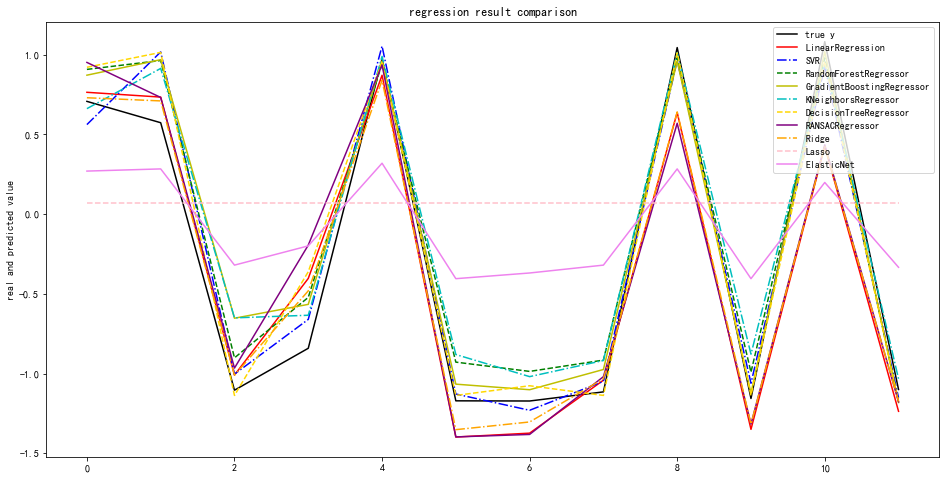

In [30]:
# 模型效果可视化
plt.figure(figsize=(16, 8))  # 创建画布
plt.plot(np.arange(Xtest.shape[0]), ytest, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c', 'gold', 'purple', 'orange', 'pink', 'Violet']  # 颜色列表
linestyle_list = ['-', '-.', '--', '-', '-.', '--', '-', '-.', '--', '-']  # 样式列表
for i, pre_y in enumerate(y_pred):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(Xtest.shape[0]), y_pred[i], color=color_list[i], linestyle=linestyle_list[i], label=mnames[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.show()  # 展示图像

In [31]:
pred = pd.DataFrame(scaler2.inverse_transform(y_pred)).T
pred.columns = ['线性回归', '支持向量机', '随机森林', 'GBDT', 'KNN', '决策树', 'RANSAC', 'Ridge', 'Lasso', '弹性网络']
pred['实际值'] = pd.DataFrame(scaler2.inverse_transform(ytest))
pred

,线性回归,支持向量机,随机森林,GBDT,KNN,决策树,RANSAC,Ridge,Lasso,弹性网络,实际值
0,64.387366,57.919168,68.9790,67.818239,61.1100,69.400,70.375029,63.295914,42.155792,48.598653,62.570
1,63.427260,72.478674,70.7570,70.927259,69.1740,72.380,63.354030,62.660968,42.155792,49.034931,58.290
2,7.721669,7.911844,11.1740,19.112301,19.1860,3.640,9.123809,7.706375,42.155792,29.753863,4.690
3,27.086067,18.876818,23.2854,21.888153,19.7068,28.430,33.760771,24.594489,42.155792,33.610076,13.090
4,67.803638,73.642424,70.1180,70.657659,71.5800,70.610,69.884333,66.781973,42.155792,50.174910,71.040
5,-4.696577,3.921421,10.3150,5.900867,11.8388,3.640,-4.673189,-3.217861,42.155792,27.037627,2.559
6,-3.917884,0.665266,8.4560,4.784855,7.4062,5.580,-4.176413,-1.676880,42.155792,28.177606,2.524
7,6.693759,6.461262,10.7200,8.836695,10.6368,3.640,7.399944,6.969226,42.155792,29.753863,4.350
8,60.343530,70.780644,71.3410,70.634105,72.3440,72.290,58.182436,60.449520,42.155792,49.034931,73.350
9,-3.154712,6.083739,8.2950,4.076030,11.9092,3.640,-2.087392,-2.112137,42.155792,27.037627,3.030


In [32]:
x = data[['gray']]
y = data['锡精矿品位']

Xtrain, Xtest, ytrain, ytest, scaler2 = data_preprocessing(x, y)
df_cv, df_metrics, y_pred, mnames = training_model(Xtrain, ytrain, Xtest, ytest)

In [33]:
df_cv.mean(axis=1).sort_values(ascending=False)

KNeighborsRegressor          0.377772
Ridge                        0.376636
LinearRegression             0.371402
SVR                          0.348677
RandomForestRegressor        0.209626
GradientBoostingRegressor    0.124403
DecisionTreeRegressor        0.107218
ElasticNet                   0.000293
Lasso                       -0.315172
RANSACRegressor             -0.727616
dtype: float64

In [34]:
df_cv.std(axis=1).sort_values(ascending=True)

ElasticNet                   0.298699
Lasso                        0.364993
Ridge                        0.502506
LinearRegression             0.518856
KNeighborsRegressor          0.725958
GradientBoostingRegressor    0.805682
DecisionTreeRegressor        0.811098
RandomForestRegressor        0.819289
SVR                          0.874773
RANSACRegressor              1.019232
dtype: float64

In [35]:
df_metrics.sort_values(by='r2', ascending=False)

,ev,mae,mse,r2
SVR,7.519573e-01,0.305270,0.240605,0.750849
RANSACRegressor,7.185670e-01,0.451068,0.274277,0.715981
LinearRegression,7.087139e-01,0.472459,0.281793,0.708199
Ridge,7.029576e-01,0.478518,0.287673,0.702109
KNeighborsRegressor,6.702167e-01,0.442956,0.349735,0.637844
GradientBoostingRegressor,6.075486e-01,0.400951,0.388916,0.597271
DecisionTreeRegressor,5.933813e-01,0.407821,0.401615,0.584121
RandomForestRegressor,5.296484e-01,0.451841,0.479797,0.503162
ElasticNet,2.466378e-01,0.868453,0.797930,0.173730
Lasso,-4.440892e-16,1.014098,1.082348,-0.120789


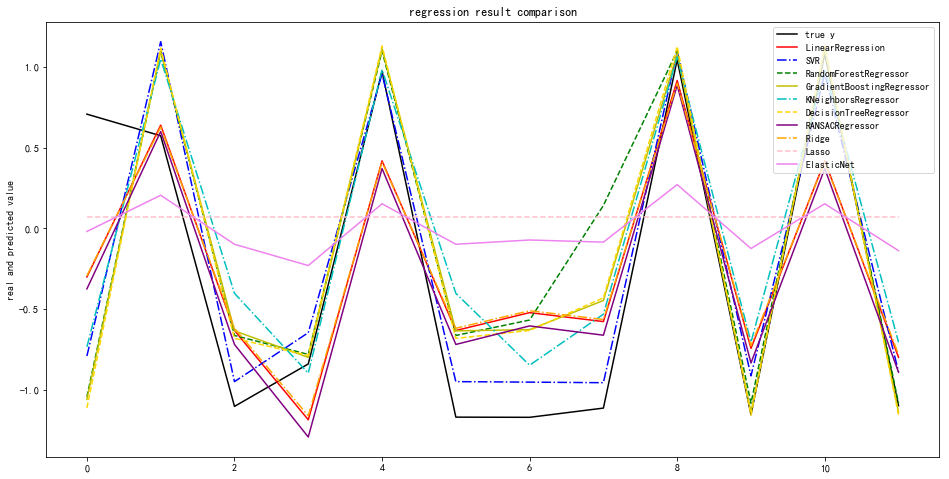

In [36]:
# 模型效果可视化
plt.figure(figsize=(16, 8))  # 创建画布
plt.plot(np.arange(Xtest.shape[0]), ytest, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c', 'gold', 'purple', 'orange', 'pink', 'Violet']  # 颜色列表
linestyle_list = ['-', '-.', '--', '-', '-.', '--', '-', '-.', '--', '-']  # 样式列表
for i, pre_y in enumerate(y_pred):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(Xtest.shape[0]), y_pred[i], color=color_list[i], linestyle=linestyle_list[i], label=mnames[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.show()  # 展示图像

In [37]:
pred = pd.DataFrame(scaler2.inverse_transform(y_pred)).T
pred.columns = ['线性回归', '支持向量机', '随机森林', 'GBDT', 'KNN', '决策树', 'RANSAC', 'Ridge', 'Lasso', '弹性网络']
pred['实际值'] = pd.DataFrame(scaler2.inverse_transform(ytest))
pred

,线性回归,支持向量机,随机森林,GBDT,KNN,决策树,RANSAC,Ridge,Lasso,弹性网络,实际值
0,30.329554,14.664937,6.580333,6.074944,16.4680,4.390000,27.959269,30.563728,42.155792,39.333231,62.570
1,60.392513,76.923169,74.982000,75.021037,73.4720,75.670000,59.133761,60.031403,42.155792,46.508339,58.290
2,19.719098,9.594484,18.734500,19.645926,27.0820,18.160000,16.956508,20.163372,42.155792,36.800840,4.690
3,2.035004,19.284942,14.976400,14.405884,11.2740,14.790000,-1.381428,2.829446,42.155792,32.580188,13.090
4,53.318876,70.598793,75.103000,75.540302,71.4000,76.080000,51.798586,53.097833,42.155792,44.820078,71.040
5,19.719098,9.594484,18.734500,19.645926,27.0820,18.160000,16.956508,20.163372,42.155792,36.800840,2.559
6,23.255917,9.492360,21.793167,19.891597,12.8414,19.720000,20.624095,23.630158,42.155792,37.644970,2.524
7,21.487507,9.378759,44.490917,25.655752,22.9460,26.183333,18.790301,21.896765,42.155792,37.222905,4.350
8,69.234560,75.001790,75.093000,74.590449,73.9200,75.940000,68.302728,68.698367,42.155792,48.618665,73.350
9,16.182279,10.732489,5.306833,3.529198,17.3972,2.978000,13.288921,16.696587,42.155792,35.956709,3.030


In [38]:
x = data[['A']]
y = data['锡精矿品位']

Xtrain, Xtest, ytrain, ytest, scaler2 = data_preprocessing(x, y)
df_cv, df_metrics, y_pred, mnames = training_model(Xtrain, ytrain, Xtest, ytest)

In [39]:
df_cv.mean(axis=1).sort_values(ascending=False)

KNeighborsRegressor          0.885001
SVR                          0.853839
Ridge                        0.829092
LinearRegression             0.828718
RandomForestRegressor        0.800870
RANSACRegressor              0.799827
GradientBoostingRegressor    0.775169
DecisionTreeRegressor        0.775164
ElasticNet                   0.283483
Lasso                       -0.315172
dtype: float64

In [40]:
df_cv.std(axis=1).sort_values(ascending=True)

KNeighborsRegressor          0.130347
Ridge                        0.179464
LinearRegression             0.185074
SVR                          0.186813
ElasticNet                   0.218290
RANSACRegressor              0.243082
RandomForestRegressor        0.335323
Lasso                        0.364993
GradientBoostingRegressor    0.395735
DecisionTreeRegressor        0.395746
dtype: float64

In [41]:
df_metrics.sort_values(by='r2', ascending=False)

,ev,mae,mse,r2
RandomForestRegressor,9.745602e-01,0.103984,0.025564,0.973528
KNeighborsRegressor,9.716937e-01,0.107019,0.028370,0.970622
SVR,9.718740e-01,0.106753,0.028760,0.970219
GradientBoostingRegressor,9.709329e-01,0.108568,0.029336,0.969623
DecisionTreeRegressor,9.709318e-01,0.108563,0.029336,0.969622
LinearRegression,9.395475e-01,0.223062,0.066408,0.931234
Ridge,9.370206e-01,0.220888,0.067324,0.930285
RANSACRegressor,9.394696e-01,0.228925,0.069926,0.927591
ElasticNet,4.648198e-01,0.729775,0.560765,0.419318
Lasso,-4.440892e-16,1.014098,1.082348,-0.120789


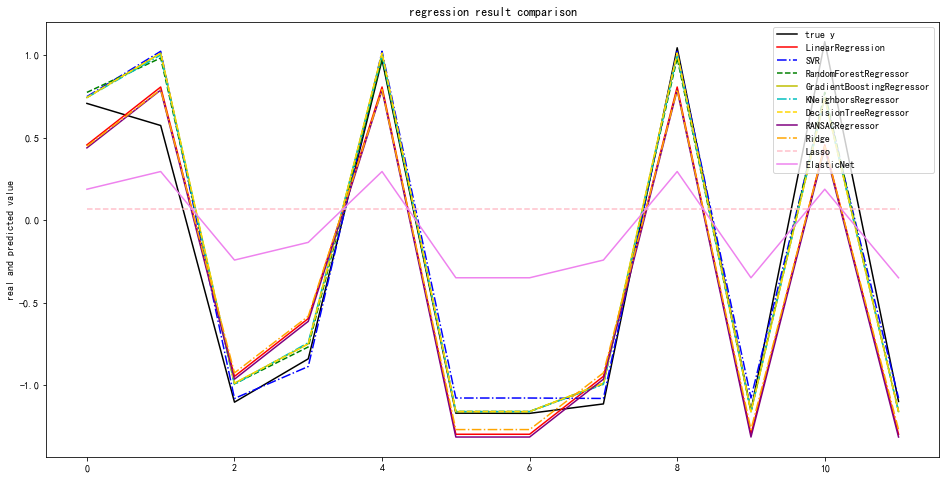

In [42]:
# 模型效果可视化
plt.figure(figsize=(16, 8))  # 创建画布
plt.plot(np.arange(Xtest.shape[0]), ytest, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c', 'gold', 'purple', 'orange', 'pink', 'Violet']  # 颜色列表
linestyle_list = ['-', '-.', '--', '-', '-.', '--', '-', '-.', '--', '-']  # 样式列表
for i, pre_y in enumerate(y_pred):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(Xtest.shape[0]), y_pred[i], color=color_list[i], linestyle=linestyle_list[i], label=mnames[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.show()  # 展示图像

In [43]:
pred = pd.DataFrame(scaler2.inverse_transform(y_pred)).T
pred.columns = ['线性回归', '支持向量机', '随机森林', 'GBDT', 'KNN', '决策树', 'RANSAC', 'Ridge', 'Lasso', '弹性网络']
pred['实际值'] = pd.DataFrame(scaler2.inverse_transform(ytest))
pred

,线性回归,支持向量机,随机森林,GBDT,KNN,决策树,RANSAC,Ridge,Lasso,弹性网络,实际值
0,54.536584,63.891979,64.708020,63.703872,63.7040,63.704000,53.957675,54.279550,42.155792,45.943902,62.570
1,65.749377,72.672064,71.375959,72.306430,71.9520,72.307143,65.162150,65.259558,42.155792,49.374644,58.290
2,9.685412,5.407753,8.249210,8.364342,8.1254,8.363444,9.139774,10.359519,42.155792,32.220935,4.690
3,20.898205,11.599175,15.387917,15.985695,16.2240,15.985000,20.344249,21.339527,42.155792,35.651677,13.090
4,65.749377,72.672064,71.375959,72.306430,71.9520,72.307143,65.162150,65.259558,42.155792,49.374644,71.040
5,-1.527381,5.494019,2.883288,2.864444,2.8634,2.863400,-2.064701,-0.620489,42.155792,28.790193,2.559
6,-1.527381,5.494019,2.883288,2.864444,2.8634,2.863400,-2.064701,-0.620489,42.155792,28.790193,2.524
7,9.685412,5.407753,8.249210,8.364342,8.1254,8.363444,9.139774,10.359519,42.155792,32.220935,4.350
8,65.749377,72.672064,71.375959,72.306430,71.9520,72.307143,65.162150,65.259558,42.155792,49.374644,73.350
9,-1.527381,5.494019,2.883288,2.864444,2.8634,2.863400,-2.064701,-0.620489,42.155792,28.790193,3.030


In [44]:
x = data[['R','V','A','B']]
y = data['锡精矿品位']

Xtrain, Xtest, ytrain, ytest, scaler2 = data_preprocessing(x, y)
df_cv, df_metrics, y_pred, mnames = training_model(Xtrain, ytrain, Xtest, ytest)

In [45]:
df_cv.mean(axis=1).sort_values(ascending=False)

RANSACRegressor              0.855529
LinearRegression             0.852703
KNeighborsRegressor          0.836887
Ridge                        0.828995
SVR                          0.809580
GradientBoostingRegressor    0.739577
RandomForestRegressor        0.716552
DecisionTreeRegressor        0.542064
ElasticNet                   0.311604
Lasso                       -0.315172
dtype: float64

In [46]:
df_cv.std(axis=1).sort_values(ascending=True)

LinearRegression             0.124277
RANSACRegressor              0.128124
Ridge                        0.168672
ElasticNet                   0.216486
KNeighborsRegressor          0.219386
SVR                          0.229015
Lasso                        0.364993
GradientBoostingRegressor    0.390368
RandomForestRegressor        0.445260
DecisionTreeRegressor        0.778991
dtype: float64

In [47]:
df_metrics.sort_values(by='r2', ascending=False)

,ev,mae,mse,r2
SVR,9.772661e-01,0.100614,0.022642,0.976553
DecisionTreeRegressor,9.738971e-01,0.117254,0.032380,0.966470
KNeighborsRegressor,9.726678e-01,0.152387,0.044627,0.953788
GradientBoostingRegressor,9.664598e-01,0.151215,0.048749,0.949520
Ridge,9.330906e-01,0.207231,0.069669,0.927857
RandomForestRegressor,9.602830e-01,0.196557,0.072803,0.924611
RANSACRegressor,9.195554e-01,0.254966,0.086352,0.910581
LinearRegression,9.156365e-01,0.254891,0.090901,0.905871
ElasticNet,4.965364e-01,0.705347,0.524572,0.456797
Lasso,-4.440892e-16,1.014098,1.082348,-0.120789


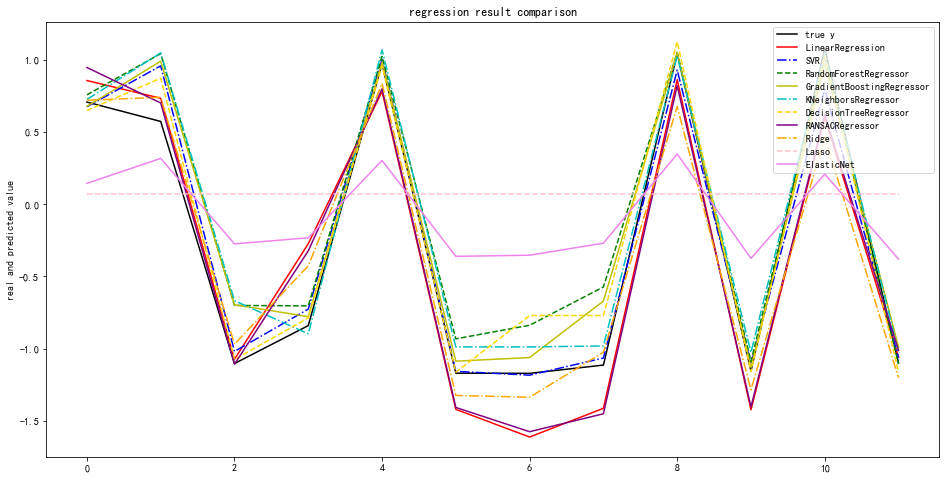

In [48]:
# 模型效果可视化
plt.figure(figsize=(16, 8))  # 创建画布
plt.plot(np.arange(Xtest.shape[0]), ytest, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c', 'gold', 'purple', 'orange', 'pink', 'Violet']  # 颜色列表
linestyle_list = ['-', '-.', '--', '-', '-.', '--', '-', '-.', '--', '-']  # 样式列表
for i, pre_y in enumerate(y_pred):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(Xtest.shape[0]), y_pred[i], color=color_list[i], linestyle=linestyle_list[i], label=mnames[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.show()  # 展示图像

In [49]:
pred = pd.DataFrame(scaler2.inverse_transform(y_pred)).T
pred.columns = ['线性回归', '支持向量机', '随机森林', 'GBDT', 'KNN', '决策树', 'RANSAC', 'Ridge', 'Lasso', '弹性网络']
pred['实际值'] = pd.DataFrame(scaler2.inverse_transform(ytest))
pred

,线性回归,支持向量机,随机森林,GBDT,KNN,决策树,RANSAC,Ridge,Lasso,弹性网络,实际值
0,67.340223,61.539094,64.1740,61.614192,63.1500,60.690,70.232765,62.976258,42.155792,44.575551,62.570
1,63.419841,70.589226,73.2840,71.627469,73.4720,67.860,62.370433,63.634936,42.155792,50.101788,58.290
2,5.637367,7.379088,17.5570,17.715319,18.6160,5.580,4.548022,8.972238,42.155792,31.182347,4.690
3,31.209979,16.738058,17.4590,15.070110,11.2740,14.790,29.639135,26.325596,42.155792,32.529328,13.090
4,64.941039,72.022355,72.6730,71.410226,74.1440,70.610,65.510611,66.693995,42.155792,49.650649,71.040
5,-5.446410,2.975275,10.1621,5.219939,8.3734,2.777,-5.030203,-2.365381,42.155792,28.422447,2.559
6,-11.574457,2.117308,13.1658,6.020906,8.3734,15.320,-10.395756,-2.765590,42.155792,28.677768,2.524
7,-5.223067,5.921890,21.6440,18.516285,8.5848,15.320,-6.425939,7.193069,42.155792,31.339759,4.350
8,67.538794,69.666141,73.5420,73.547503,72.8220,75.940,66.194204,61.604164,42.155792,51.101975,73.350
9,-5.544520,4.621542,5.1325,3.829081,7.1546,2.870,-4.887171,-1.111913,42.155792,27.971308,3.030


In [50]:
# inp = data.sort_values('锡精矿品位')[['锡精矿品位','重量']].reset_index().drop(columns='index')
# inp.plot(figsize=(16,8))

# x = inp['锡精矿品位']
# y = inp['重量']
# Xtrain = np.array(x).reshape(-1,1)
# ytrain = np.array(y)

In [51]:
# %%time

# import seaborn as sns
# sns.pairplot(data.drop(columns='重量'))

### 参数调优

In [52]:
x = data[['R','G','B','H','S','V','L','A','B.1','gray']]
x = data[['A']]
x = data[['R','V','A','B']]
y = data['锡精矿品位']

Xtrain, Xtest, ytrain, ytest, scaler2 = data_preprocessing(x, y)

In [53]:
# %%time

# from sklearn.model_selection import GridSearchCV


# params = {'C': range(1, 100, 1), 'epsilon': np.linspace(0, 1, 11), 'gamma': np.linspace(0, 1, 11)}
# gs = GridSearchCV(estimator=SVR(), param_grid=params, scoring='r2', cv=5)
# gs.fit(Xtrain, ytrain.ravel())
# gs.cv_results_, gs.best_params_, gs.best_score_

In [54]:
# gs.best_score_

In [55]:
# gs.best_params_

In [56]:
# %%time

# # 嵌套交叉验证

# from sklearn.model_selection import GridSearchCV

# param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
# params = {'C': param_range, 'epsilon': param_range, 'gamma': param_range}
# gs = GridSearchCV(estimator=SVR(),#更换其他算法进行比较
#                   param_grid=params,
#                   scoring='r2',
#                   cv=10,
#                   n_jobs=-1)
# scores = cross_val_score(gs, Xtrain, ytrain.ravel(), scoring='r2', cv=5)
# print(np.mean(scores))
# print(np.std(scores))

In [57]:
# %%time

# # 嵌套交叉验证

# from sklearn.model_selection import GridSearchCV

# param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
# params = {'n_neighbors': np.arange(1,20,2), 'leaf_size': np.arange(1,20,2), 'weights': ['distance']}
# gs = GridSearchCV(estimator=KNeighborsRegressor(),#更换其他算法进行比较
#                   param_grid=params,
#                   scoring='r2',
#                   cv=10,
#                   n_jobs=-1)
# scores = cross_val_score(gs, Xtrain, ytrain.ravel(), scoring='r2', cv=5)
# print(np.mean(scores))
# print(np.std(scores))

### 学习曲线和验证曲线

In [58]:
from sklearn.model_selection import learning_curve,validation_curve


svr = SVR()
lr = LinearRegression()
ridge = Ridge()

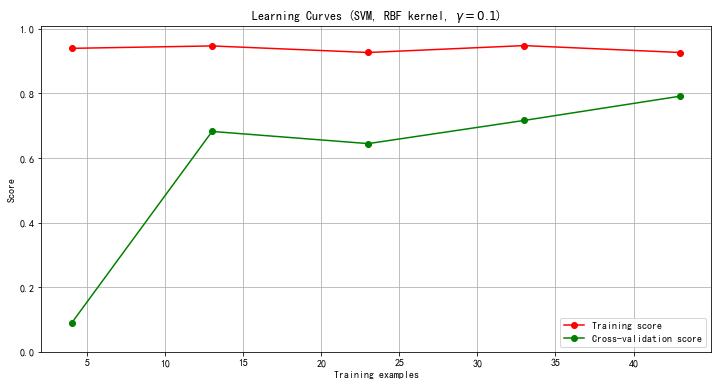

In [59]:
# 学习曲线

train_sizes, train_scores, test_scores = learning_curve(svr, Xtrain, ytrain.ravel(), cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(12,6))
plt.title('Learning Curves (SVM, RBF kernel, $\gamma=0.1$)')
plt.ylim(0, 1.01)
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

D:\anaconda3\lib\site-packages\matplotlib\mathtext.py:849: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
D:\anaconda3\lib\site-packages\matplotlib\mathtext.py:850: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


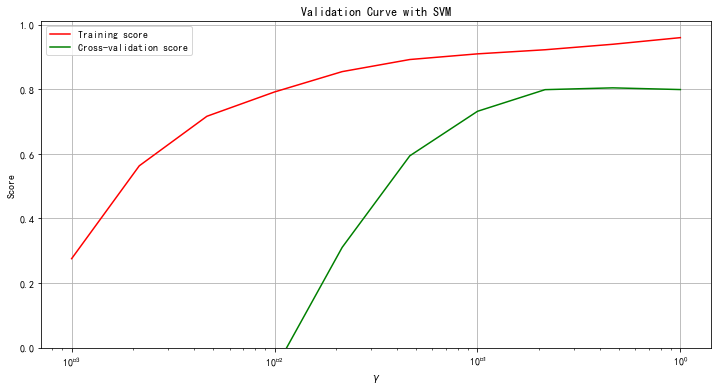

In [60]:
# 验证曲线

param_range = np.logspace(-3, 0, 10)
train_scores, test_scores = validation_curve(svr, Xtrain, ytrain.ravel(), param_name="gamma", param_range=param_range, cv=10, scoring="r2")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure(figsize=(12,6))
plt.title("Validation Curve with SVM")
plt.ylim(0.0, 1.01)
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.grid()
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.legend(loc="best")
plt.show()

### 神经网络

In [61]:
import tensorflow as tf
from tensorflow import keras


def build_model(train):
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu,
                           input_shape=(train.shape[1],)),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)])

    optimizer = tf.train.RMSPropOptimizer(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae'])
    return model

x = data[['A']]
y = data['锡精矿品位']

Xtrain, Xtest, ytrain, ytest, scaler2 = data_preprocessing(x, y)

model = build_model(Xtrain)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(Xtrain, ytrain, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

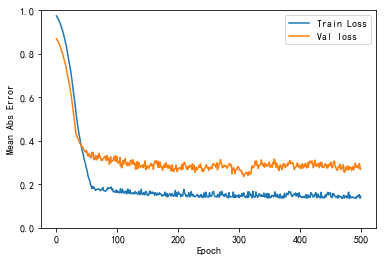

In [63]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([0, 1])

plot_history(history)


....................................................................................................
..................

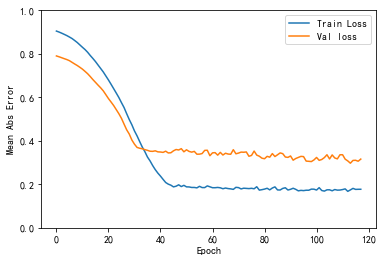

In [64]:
model = build_model(Xtrain)

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(Xtrain, ytrain, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [65]:
[loss, mae] = model.evaluate(Xtest, ytest, verbose=0)

print("Testing set Mean Abs Error: {:9.2f}".format(mae))

Testing set Mean Abs Error:      0.14


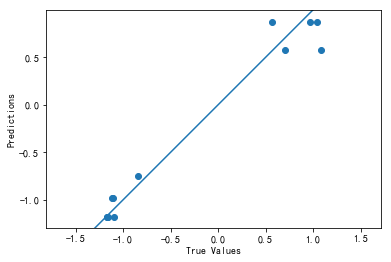

In [66]:
test_predictions = model.predict(Xtest).ravel()

plt.scatter(ytest, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

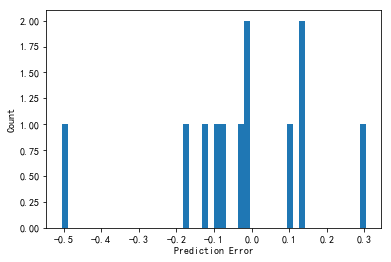

In [67]:
error = test_predictions - ytest.ravel()
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [68]:
r2_score(ytest, test_predictions)

0.9609601431635992

In [69]:
import lightgbm as lgb


print('Loading data...')
# load or create your dataset

# create dataset for lightgbm
lgb_train = lgb.Dataset(Xtrain, ytrain.ravel())
lgb_eval = lgb.Dataset(Xtest, ytest.ravel(), reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')

# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')

# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')

# predict
y_pred = gbm.predict(Xtest, num_iteration=gbm.best_iteration)

# eval
print('The rmse of prediction is:', mean_squared_error(ytest, y_pred) ** 0.5)

Loading data...
Starting training...
[1]	valid_0's l2: 1.08235	valid_0's l1: 1.0141
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 1.13367	valid_0's l1: 1.02548
[3]	valid_0's l2: 1.19433	valid_0's l1: 1.03687
[4]	valid_0's l2: 1.26432	valid_0's l1: 1.04825
[5]	valid_0's l2: 1.34364	valid_0's l1: 1.05964
[6]	valid_0's l2: 1.43229	valid_0's l1: 1.07102
Early stopping, best iteration is:
[1]	valid_0's l2: 1.08235	valid_0's l1: 1.0141
Saving model...
Starting predicting...
The rmse of prediction is: 1.019977917902464
